In [12]:
# Netflix Movie Recommendation System
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#1. Data Collection
df = pd.read_csv('netflix_titles.csv')  # Replace with your dataset path
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
#Data Collection and Cleaning
# Drop duplicates and check nulls
df.drop_duplicates(inplace=True)
print("Missing values:\n", df.isnull().sum())

# Fill missing genres and remove rows with no title
df = df.dropna(subset=['title'])
df['listed_in'] = df['listed_in'].fillna('Unknown')

# Rename for consistency
df.rename(columns={'listed_in': 'genres'}, inplace=True)

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


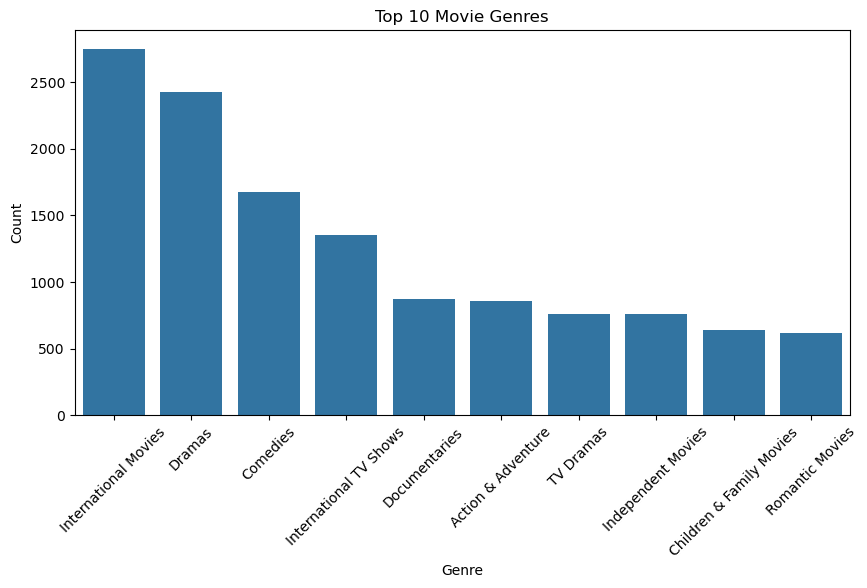

In [16]:
#2. Data Exploration
# Most common genres
from collections import Counter
genres = df['genres'].str.split(', ')
genre_counts = Counter([g for sublist in genres for g in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=top_genres, x='Genre', y='Count')
plt.xticks(rotation=45)
plt.title('Top 10 Movie Genres')
plt.show()

In [18]:
#3. Data Preprocessing
# Example: Encode genres using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres'])

# Show shape
print(tfidf_matrix.shape)

(8807, 44)


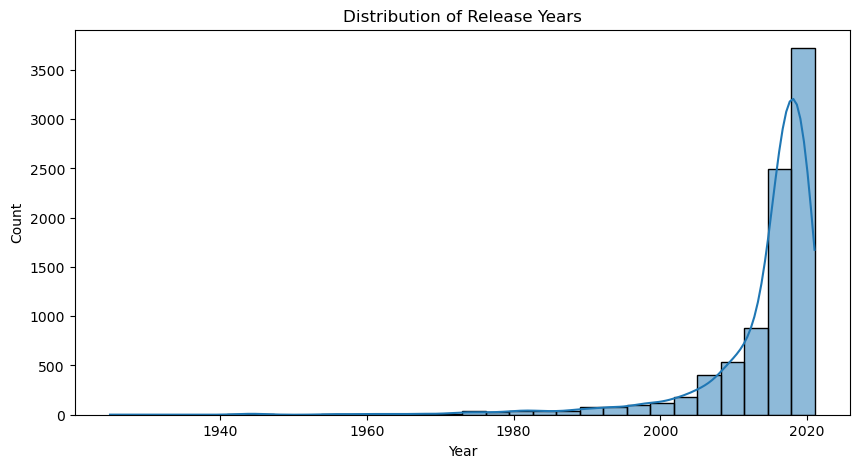

In [20]:
#4. Exploratory Data Analysis
# Convert date_added to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = df['release_year'].fillna(0).astype(int)

# Distribution of release years
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.show()

In [22]:
#Correlation Analysis
# Since ratings are missing, create dummy ratings (you'd normally use user data here)
df['dummy_rating'] = np.random.uniform(3.0, 5.0, size=len(df))

# Correlation: year vs rating
corr = df[['release_year', 'dummy_rating']].corr()
print("Correlation:\n", corr)

Correlation:
               release_year  dummy_rating
release_year      1.000000      0.009928
dummy_rating      0.009928      1.000000


In [32]:
#5. Feature Selection
#Recommendation System (TF-IDF + Cosine Similarity)
# TF-IDF on genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Build title index
indices = pd.Series(df.index, index=df['title'].str.lower()).drop_duplicates()

# Recommendation Function
def recommend(title, num=5):
    title = title.lower()
    if title not in indices:
        return "Title not found in dataset."
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num+1]
    movie_indices = [i[0] for i in sim_scores]
    
    return df['title'].iloc[movie_indices]

#Example
recommend('Sherlock')

1166    The Irregulars
1217           The One
1991      Criminal: UK
2184          Get Even
2530       White Lines
Name: title, dtype: object

In [36]:
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (8807, 44)


In [38]:
#Conclusion
'''This notebook provides a content-based movie recommendation system using TF-IDF and cosine similarity based on movie genres. 
For a more advanced system, incorporate user ratings and collaborative filtering.'''

'This notebook provides a content-based movie recommendation system using TF-IDF and cosine similarity based on movie genres. \nFor a more advanced system, incorporate user ratings and collaborative filtering.'